https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import SpectralClustering

In [2]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import csv

In [84]:
from sklearn.datasets import load_wine
df= data = load_wine(return_X_y=True)
y=df[1]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [40]:
df=df[0]
df

array([[14.230, 1.710, 2.430, ..., 1.040, 3.920, 1065.000],
       [13.200, 1.780, 2.140, ..., 1.050, 3.400, 1050.000],
       [13.160, 2.360, 2.670, ..., 1.030, 3.170, 1185.000],
       ...,
       [13.270, 4.280, 2.260, ..., 0.590, 1.560, 835.000],
       [13.170, 2.590, 2.370, ..., 0.600, 1.620, 840.000],
       [14.130, 4.100, 2.740, ..., 0.610, 1.600, 560.000]])

In [41]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [42]:
# k=clustering number
k=3
cluster=SpectralClustering(n_clusters=k,random_state=0)
cluster.fit(df)
yy=cluster.labels_

In [29]:
df = pd.read_csv('UCI/wine.data', delimiter = ",", names=["l0", "l1", "l2", "l3", "l4","l5","l6","l7","l8","l9","l10","l11","l12","l13"])
df

,l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [35]:
df = df.mask(np.random.choice([True, False], size=df.shape, p=[.20,.80]))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,NaN,NaN,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,NaN,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,NaN,NaN,1.03,3.17,1185.0
3,14.37,1.95,2.50,NaN,NaN,3.85,3.49,0.24,2.18,NaN,0.86,NaN,NaN
4,13.24,2.59,2.87,21.0,NaN,2.80,2.69,0.39,1.82,4.32,NaN,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,NaN,2.45,20.5,95.0,1.68,0.61,NaN,1.06,NaN,0.64,1.74,740.0
174,13.40,3.91,2.48,NaN,102.0,1.80,0.75,0.43,1.41,7.30,0.70,NaN,750.0
175,NaN,4.28,2.26,20.0,120.0,1.59,NaN,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,NaN,20.0,NaN,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [36]:
#df=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
df = df.mask(np.random.choice([True, False], size=df.shape, p=[.20,.80]))
table2=df
x,y=table2.shape
print(x,y)

178 13


In [37]:
for k in tqdm(range(100)):
    W=[[0.0 for i in range(x)] for j in range(x)]
    for i in range(x):
        for j in range(i+1,x,1):
            z=table2[i:i+1:].append(table2[j:j+1:], ignore_index=True)
            z=z.dropna(axis=1)
            if z.shape[1] == 0:
                continue
            W[i][j]=W[j][i]=pairwise_distances(z.values,metric="l1")[0][1]
            del(z)
        #print(i)
print(W)
with open("wine_122_corrected.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(W)


KeyboardInterrupt: 

In [65]:
df = pd.read_csv("wine_1_corrected.csv",header=None)

In [66]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.00,30.31,27.56,433.10,342.22,403.05,257.08,232.22,52.12,52.12,...,345.31,459.75,591.06,639.68,448.50,360.60,344.41,248.81,240.88,41.70
1,30.31,0.00,12.20,24.72,29.76,20.64,9.49,7.51,5.31,11.33,...,26.78,35.07,9.03,16.74,25.81,19.57,7.62,40.38,29.19,14.95


In [67]:
kk=df.values.tolist()
len(kk)

178

In [68]:
kkk=np.array(kk)
kkk=kkk[:500,:500]
kkk

array([[0.000, 30.310, 27.560, ..., 248.810, 240.880, 41.700],
       [30.310, 0.000, 12.200, ..., 40.380, 29.190, 14.950],
       [27.560, 12.200, 0.000, ..., 29.740, 29.760, 15.530],
       ...,
       [248.810, 40.380, 29.740, ..., 0.000, 8.130, 27.150],
       [240.880, 29.190, 29.760, ..., 8.130, 0.000, 27.580],
       [41.700, 14.950, 15.530, ..., 27.150, 27.580, 0.000]])

In [69]:
vectorizer = np.vectorize(lambda x: 1 if x < 55 else 0)

Ww = np.vectorize(vectorizer)(kk)

In [70]:
# degree matrix
D = np.diag(np.sum(np.array(Ww), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - Ww
print('laplacian matrix:')
print(L)

degree matrix:
[[ 43   0   0 ...   0   0   0]
 [  0 175   0 ...   0   0   0]
 [  0   0 176 ...   0   0   0]
 ...
 [  0   0   0 ...  44   0   0]
 [  0   0   0 ...   0  45   0]
 [  0   0   0 ...   0   0 174]]
laplacian matrix:
[[ 42  -1  -1 ...   0   0  -1]
 [ -1 174  -1 ...  -1  -1  -1]
 [ -1  -1 175 ...  -1  -1  -1]
 ...
 [  0  -1  -1 ...  43  -1  -1]
 [  0  -1  -1 ...  -1  44  -1]
 [ -1  -1  -1 ...  -1  -1 173]]


In [71]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[0.000 7.967 21.848 28.475 36.248 36.444 36.488 36.510 36.680 36.828
 36.986 37.285 37.693 37.837 38.049 38.419 38.813 38.824 39.260 39.739
 39.799 40.000 40.360 40.445 40.795 40.822 41.134 41.418 41.539 42.000
 42.300 42.352 42.756 43.000 43.133 43.253 43.307 43.480 43.878 43.965
 44.000 44.027 44.068 44.317 44.455 44.574 44.608 44.741 44.822 45.000
 45.005 45.050 45.104 45.204 45.221 45.320 45.488 45.581 45.796 45.895
 45.908 46.000 46.107 46.243 46.439 46.678 46.739 47.056 47.142 47.258
 47.360 47.432 47.660 47.760 47.862 47.952 48.128 48.371 48.461 49.012
 49.100 49.152 49.370 49.376 49.544 49.651 50.000 50.050 50.288 50.720
 51.003 51.149 51.200 51.240 51.527 51.671 51.755 51.795 51.833 51.906
 51.982 52.124 52.394 52.521 52.766 52.840 52.864 52.983 53.000 53.233
 53.470 53.593 53.629 53.739 54.159 54.265 54.376 54.601 54.635 54.793
 54.910 55.000 55.248 55.441 55.738 55.914 56.141 56.425 56.799 57.000
 57.000 57.000 57.037 57.641 57.890 58.190 58.255 58.425 58.812 59

In [72]:
np.where(e<100000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

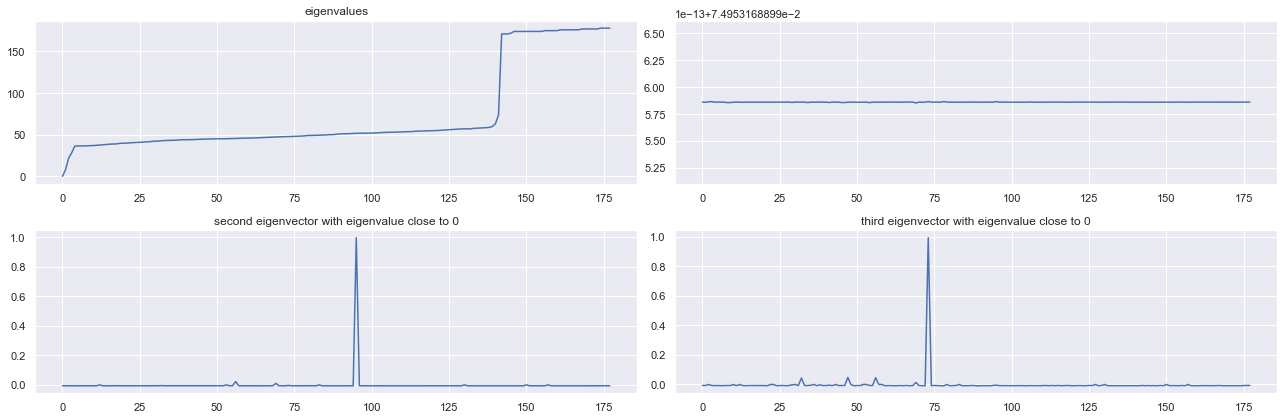

In [73]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10000)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

Text(0, 0.5, 'Values')

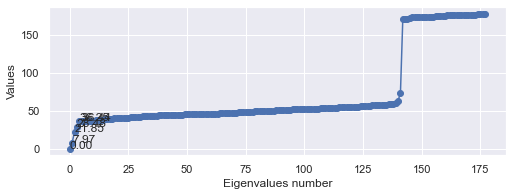

In [74]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e, marker = 'o')
x=[0,1,2,3,4,5]
for x, y, text in zip(x, e, e):
    plt.text(x, y, '{0:.2f}'.format(text))
plt.xlabel("Eigenvalues number")
plt.ylabel("Values")

Text(0, 0.5, 'Value at ith position of v')

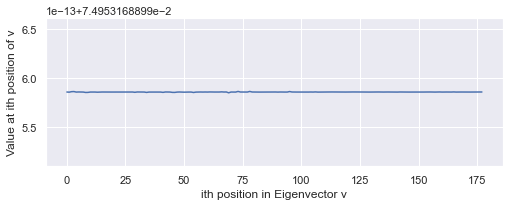

In [75]:
fig = plt.figure(figsize=[18, 6])

i = np.where(e < 10000)[0]
ax2 = plt.subplot(221)
plt.plot(v[:, i[0]])
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")

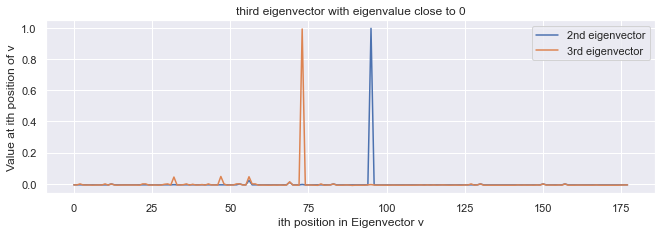

In [76]:
fig = plt.figure(figsize=[18, 6])
ax3 = plt.subplot(221)
plt.plot(v[:, i[1]], label="2nd eigenvector")#, marker = 'o')
plt.legend()
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(221)
plt.plot(v[:, i[2]], label="3rd eigenvector")#, marker = 'o')
plt.legend()
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

In [77]:
df1=pd.DataFrame(v[:, i[1]])
df2=pd.DataFrame(v[:, i[2]])
df3=pd.DataFrame(v[:, i[0]])
df=pd.concat([df1, df2], axis=1)
df.columns=['2nd eigenvector','3rd eigenvector']
writer = pd.ExcelWriter('wine_results.xlsx', engine = 'xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
df3.to_excel(writer, sheet_name='Sheet2')
writer.save()

In [78]:

writer = pd.ExcelWriter('wine_results.xlsx', engine = 'xlsxwriter')

writer.save()

In [79]:
U = np.array(v[:, i[2]])

In [80]:
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U.reshape(-1, 1))
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [83]:
y

36.44437205056022

In [85]:
purity_score(y,km.labels_)

0.4157303370786517

In [87]:
print(f1_score(km.labels_, y, average="weighted"))
print(precision_score(y, km.labels_, average="weighted"))
print(recall_score(km.labels_, y, average="weighted"))   

0.4700408020017896
0.5055534030737441
0.3202247191011236


In [10]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

0.9775280898876404

In [52]:
len(km.labels_)

178

In [54]:
yy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [88]:
purity_score(y, yy)

0.4044943820224719

In [89]:
print(f1_score(yy, y, average="weighted"))
print(precision_score(y,yy, average="weighted"))
print(recall_score(yy, y, average="weighted"))   

0.4887640449438202
0.10861423220973782
0.32584269662921345


In [45]:
features = df
labels = pd.DataFrame(yy) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data


In [49]:
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [60]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [61]:
labeledColleges = pd.concat((features,labels),axis=1)
#labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

In [63]:
labeledColleges.columns=["l0", "l1", "l2", "l3", "l4","l5","l6","l7","l8","l9","l10","l11","l12","labels"]
labeledColleges

,l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0


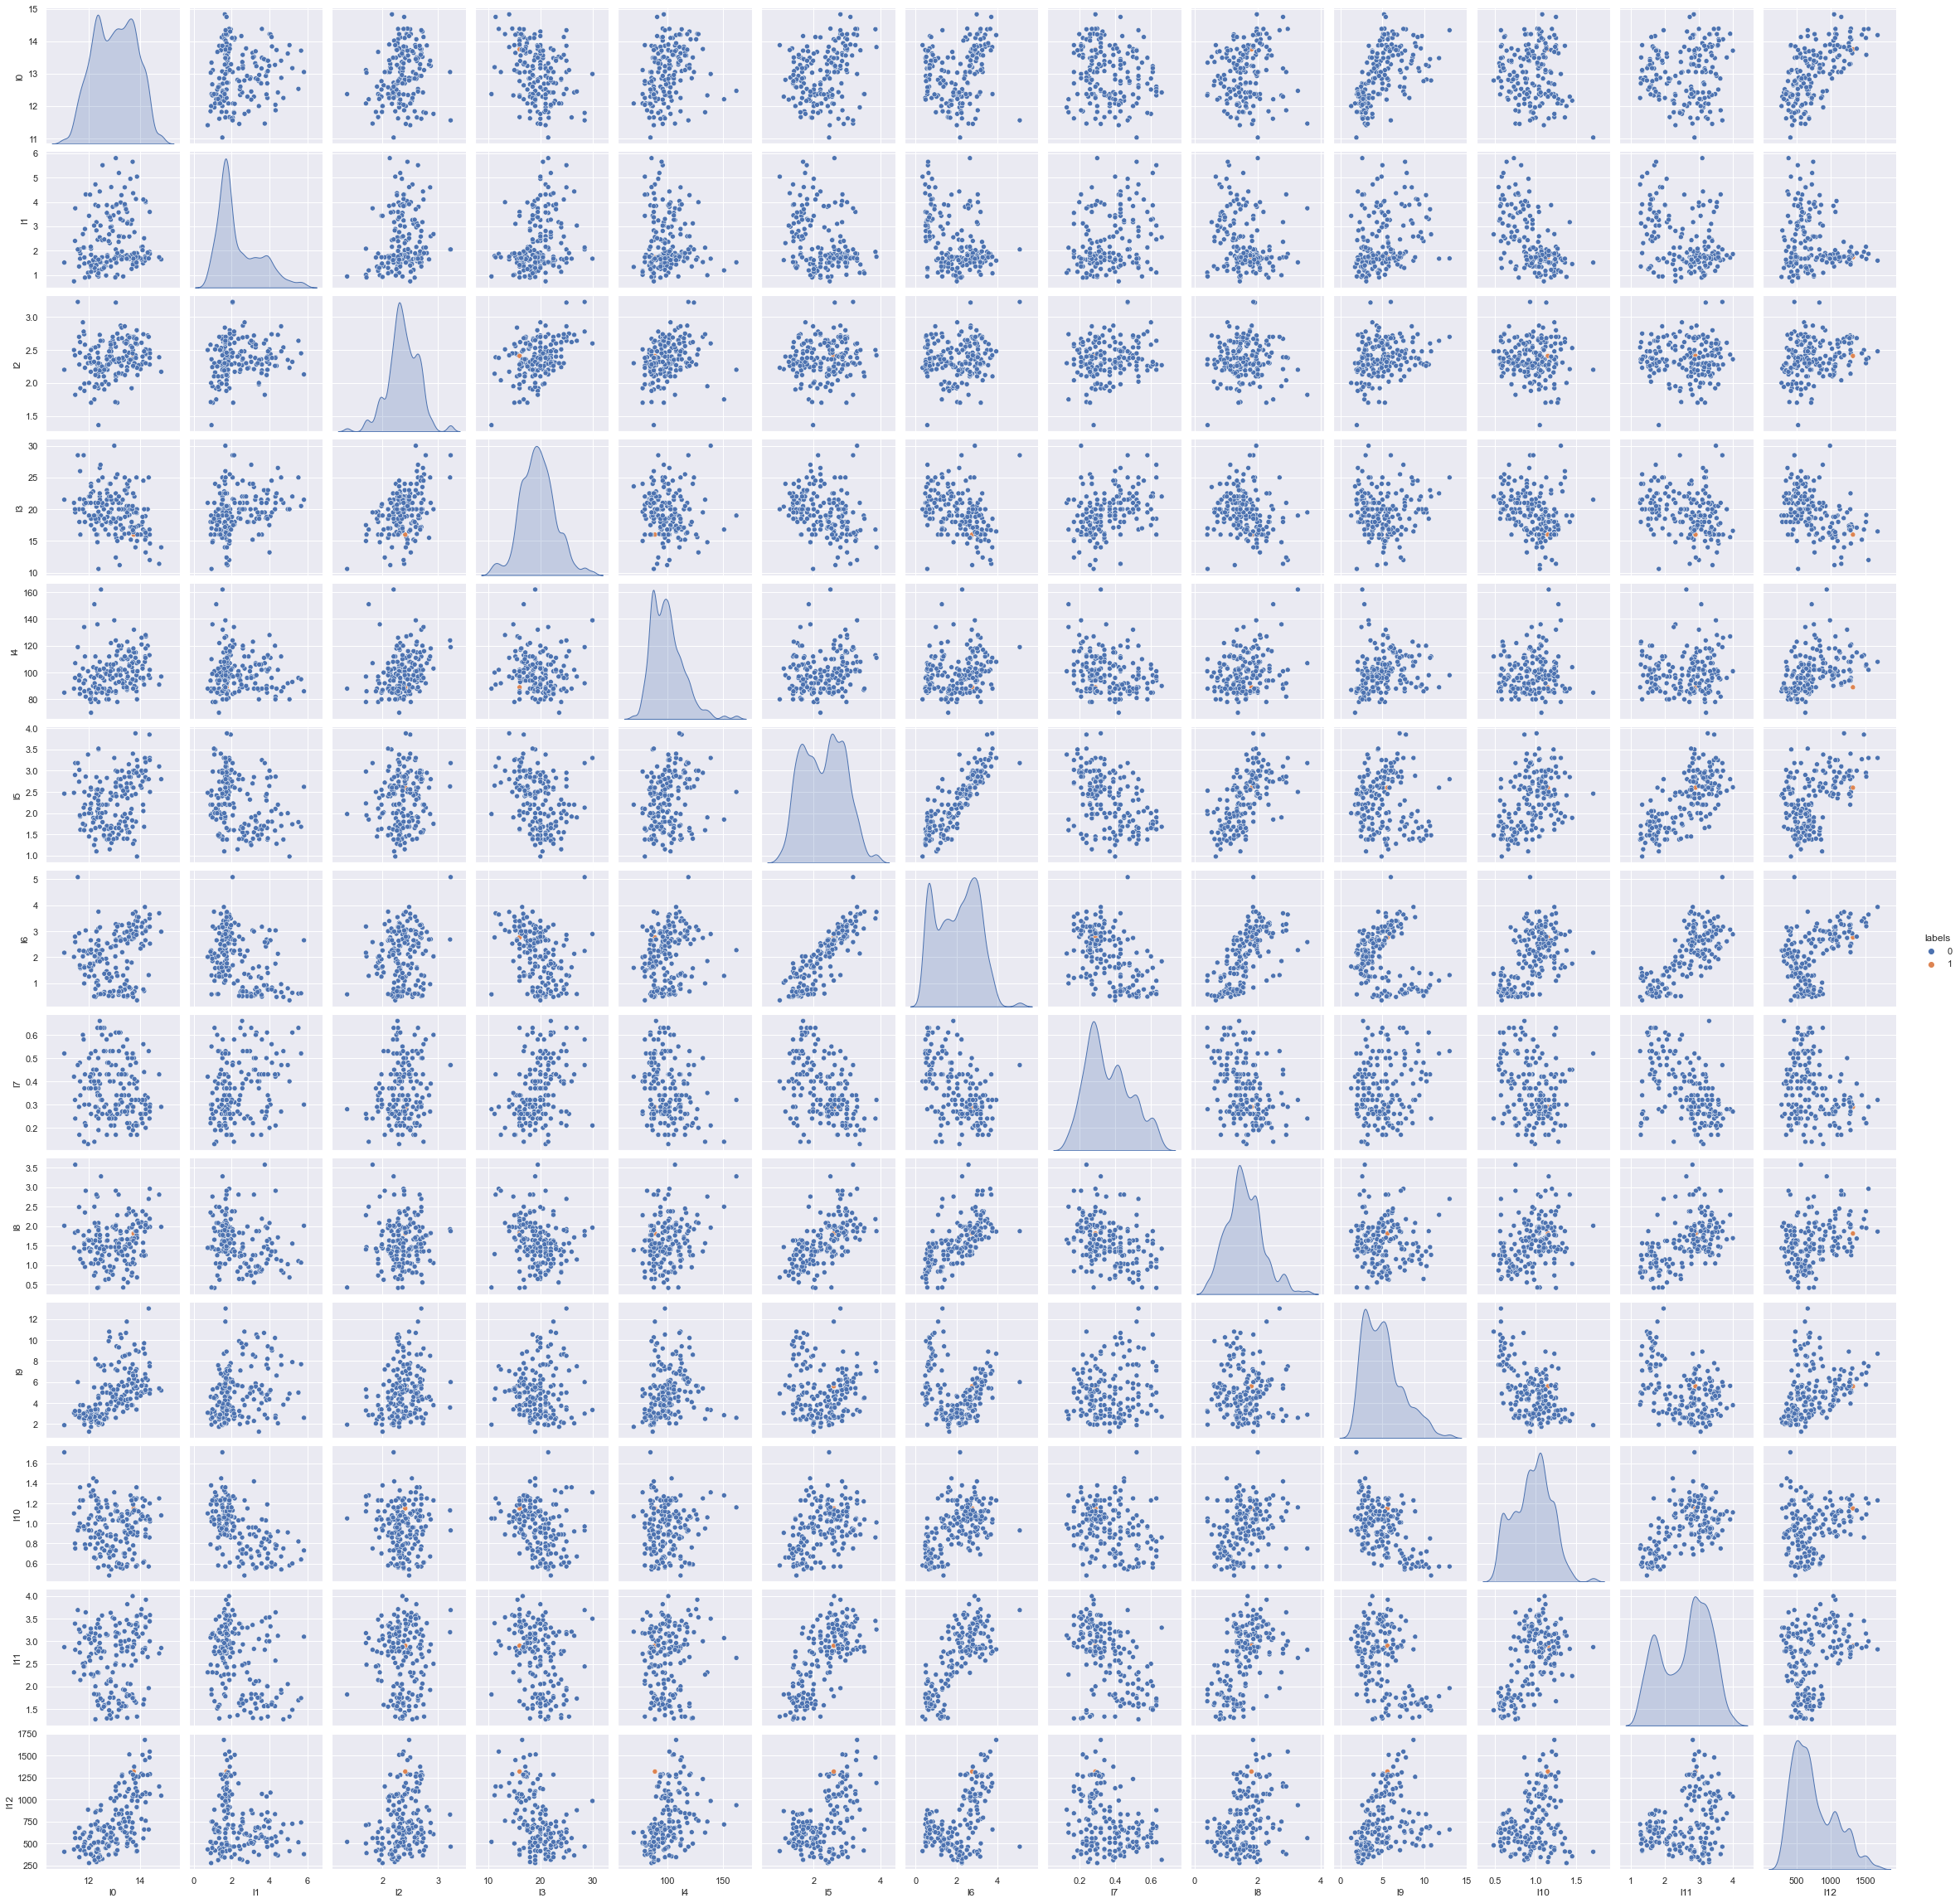

In [64]:
sns.pairplot(labeledColleges,hue='labels',diag_kws={'bw': 0.2})

In [ ]:
#sns.lmplot(x='Top10perc',y='S.F.Ratio',data=labeledColleges,hue='labels',fit_reg=False)

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels, metric='euclidean', sample_size=None, random_state=None)

0.43716614527918135